# Perceptron Algorithm

In [2]:
import numpy as np
# Setting the random seed, feel free to change it and see different solutions.
np.random.seed(42)

In [3]:
def stepFunction(t):
    if t >= 0:
        return 1
    return 0

In [4]:
def prediction(X, W, b):
    return stepFunction((np.matmul(X,W)+b)[0])

## Perceptron Trick

In [5]:
# The function should receive as inputs the data X, the labels y,
# the weights W (as an array), and the bias b,
# update the weights and bias W, b, according to the perceptron algorithm,
# and return W and b.

def perceptronStep(X, y, W, b, learn_rate = 0.01):
    for i in range(len(X)):
        y_hat = prediction(X.loc[i],W,b)
        
        if y[i]-y_hat == 1:
            W[0] += X.loc[i][0]*learn_rate
            W[1] += X.loc[i][1]*learn_rate
            b += learn_rate
        elif y[i]-y_hat == -1:
            W[0] -= X.loc[i][0]*learn_rate
            W[1] -= X.loc[i][1]*learn_rate
            b -= learn_rate
            
    return W, b

In [6]:
# This function runs the perceptron algorithm repeatedly on the dataset,
# and returns a few of the boundary lines obtained in the iterations, or plotting purposes.

def trainPerceptronAlgorithm(X, y, learn_rate = 0.01, num_epochs = 25):
    x_min, x_max = min(X.T[0]), max(X.T[0])
    y_min, y_max = min(X.T[1]), max(X.T[1])
    
    W = np.array(np.random.rand(2,1))
    b = np.random.rand(1)[0] + x_max
    
    # These are the solution lines that get plotted below.
    boundary_lines = []
    for i in range(num_epochs):
        # In each epoch, we apply the perceptron step.
        W, b = perceptronStep(X, y, W, b, learn_rate)
        boundary_lines.append((-W[0]/W[1], -b/W[1]))
    return boundary_lines

------

# Load the data and test

In [7]:
import pandas as pd

In [8]:
df = pd.read_csv('data/data.csv', names=['p', 'q', 'True Label'])

In [9]:
df.head()

,p,q,True Label
0,0.78051,-0.063669,1
1,0.28774,0.291390,1
2,0.40714,0.178780,1
3,0.29230,0.421700,1
4,0.50922,0.352560,1


In [10]:
X = df.drop('True Label', axis=1)
y = df['True Label']

In [46]:
result_list = trainPerceptronAlgorithm(X, y, learn_rate = 0.01, num_epochs = 25)

In [47]:
result_list

[(array([-3.52683066]), array([17.79077034])),
 (array([-1.36993156]), array([1.40455998])),
 (array([-1.32691397]), array([1.13654709])),
 (array([-1.30695369]), array([1.13266452])),
 (array([-1.28712931]), array([1.12880839])),
 (array([-1.26743946]), array([1.12497843])),
 (array([-1.24788277]), array([1.12117437])),
 (array([-1.22845789]), array([1.11739595])),
 (array([-1.2091635]), array([1.11364291])),
 (array([-1.1843636]), array([1.06242989])),
 (array([-1.1656593]), array([1.05894384])),
 (array([-1.14707734]), array([1.0554806])),
 (array([-1.12861652]), array([1.05203993])),
 (array([-1.11027568]), array([1.04862163])),
 (array([-1.09205363]), array([1.04522546])),
 (array([-1.07394924]), array([1.04185123])),
 (array([-1.05596135]), array([1.0384987])),
 (array([-1.03510057]), array([0.99082452])),
 (array([-1.01763314]), array([0.98770678])),
 (array([-1.0002753]), array([0.9846086])),
 (array([-0.98302601]), array([0.98152979])),
 (array([-0.96588425]), array([0.9784701

------

# Visualization


In [42]:
weight_list = []
bias_list  = []

for i in range(len(result_list)):
    weight = result_list[i][0]
    bias = result_list[i][1]
    for j in range(len(weight)):
        weight_list.append(weight[j])
        bias_list.append(bias[j])

In [43]:
import matplotlib.pyplot as plt

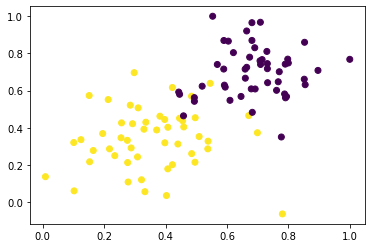

In [45]:
plt.scatter(data=df, x='p', y='q', c='True Label')
# plt.plot(weight_list, bias_list);